# Pre-requisites

In [ ]:
# Importing Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Exploring the data

# df.shape

# Loading the data

In [ ]:
# Loading the data

df_unclean = pd.read_csv('/Users/akshayamahesh/Desktop/Capstone/Code/forestfires.csv')
df_unclean.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Getting a description of the dataset

In [ ]:
# Getting a description of the dataset

df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
# Checking the shape of the dataset

print("The shape of the dataset is:", df_unclean.shape)

The shape of the dataset is: (517, 13)


# Pre-processing the data

### Removing outliers

In [ ]:
# Checking for NA values

print("The number of NA values in the dataset is:", df_unclean.isna().sum().sum())

The number of NA values in the dataset is: 0


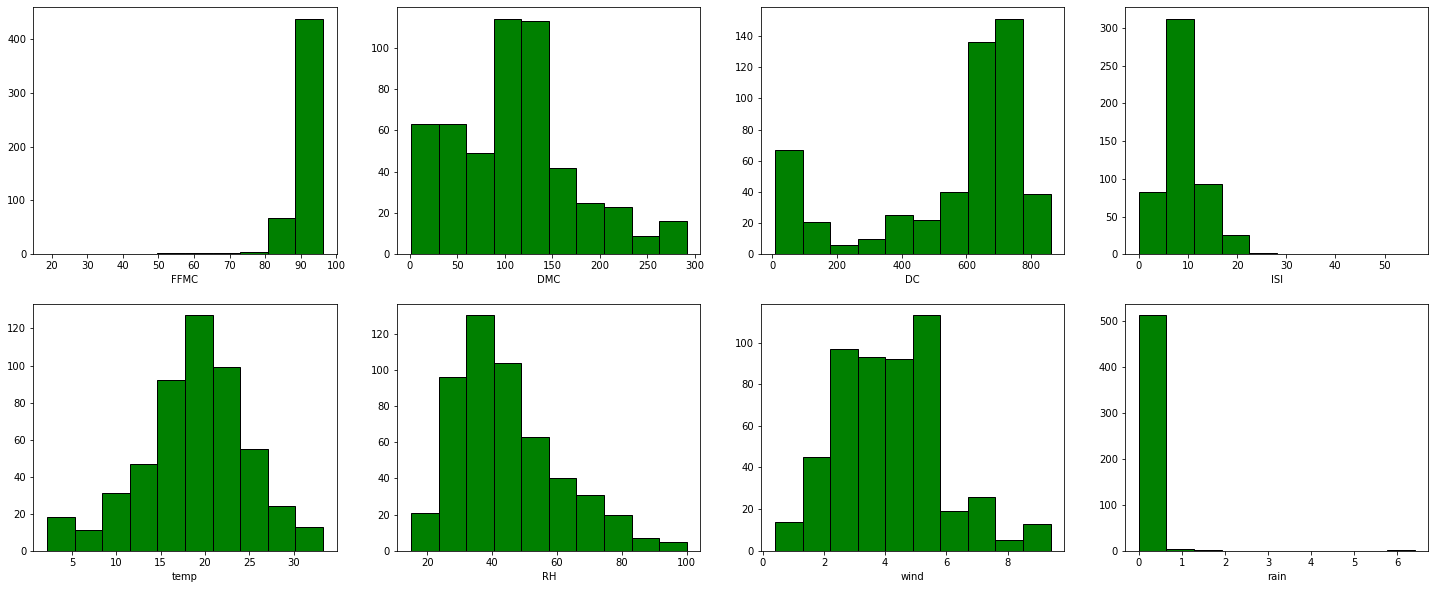

In [ ]:
# Removing outliers

fig, ax = plt.subplots(2, 4, figsize = (25, 10))
ax[0, 0].hist(df_unclean['FFMC'], color = 'green', edgecolor = 'black')
ax[0, 0].set(xlabel = 'FFMC')
ax[0, 1].hist(df_unclean['DMC'], color = 'green', edgecolor = 'black')
ax[0, 1].set(xlabel = 'DMC')
ax[0, 2].hist(df_unclean['DC'], color = 'green', edgecolor = 'black')
ax[0, 2].set(xlabel = 'DC')
ax[0, 3].hist(df_unclean['ISI'], color = 'green', edgecolor = 'black')
ax[0, 3].set(xlabel = 'ISI')
ax[1, 0].hist(df_unclean['temp'], color = 'green', edgecolor = 'black')
ax[1, 0].set(xlabel = 'temp')
ax[1, 1].hist(df_unclean['RH'], color = 'green', edgecolor = 'black')
ax[1, 1].set(xlabel = 'RH')
ax[1, 2].hist(df_unclean['wind'], color = 'green', edgecolor = 'black')
ax[1, 2].set(xlabel = 'wind')
ax[1, 3].hist(df_unclean['rain'], color = 'green', edgecolor = 'black')
ax[1, 3].set(xlabel = 'rain')
plt.show()

In [ ]:
outliers = (df_unclean['FFMC'] < 72) | (df_unclean['ISI'] > 22) | (df_unclean['rain'] > 1.2)
df_unclean_without_outliers = df_unclean.loc[~outliers]
print('The shape of the dataset with outliers:', df_unclean.shape)
print('The shape of the dataset without outliers:', df_unclean_without_outliers.shape)

The shape of the dataset with outliers: (517, 13)
The shape of the dataset without outliers: (505, 13)


In [ ]:
df_unclean = df_unclean_without_outliers

### Reducing the skewness in the dataset

In [ ]:
# Checking for skewness in the predictor variable

df_unclean.skew(axis = 0)

/var/folders/fr/drfqt32j53zggrw4_vm9rzhc0000gn/T/ipykernel_80855/3939693283.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_unclean.skew(axis = 0)


X        0.043943
Y        0.431543
FFMC    -1.627092
DMC      0.549436
DC      -1.120756
ISI      0.649746
temp    -0.329314
RH       0.841094
wind     0.587409
rain    11.728918
area    12.700889
dtype: float64

In [ ]:
# Correcting the skewness in the response variable

df = df_unclean.copy()
df['area'] = np.log(df['area'] + 1)
print("Previous skew of area:", df_unclean['area'].skew())
print("Current skew of area:", df['area'].skew())

Previous skew of area: 12.70088853939291
Current skew of area: 1.205317265371448


In [ ]:
# Final cleaned dataset

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Normalizing and encoding the features

In [ ]:
# Normalizing the FWI and other climatic factors

normalizer = MinMaxScaler()
def normalize(feature):
  transform = np.array(df[feature]).reshape(-1, 1)
  df[feature] = normalizer.fit_transform(transform)

feature_list = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
for each in feature_list:
  normalize(each)

In [ ]:
# Converting categorical values to numerical values

df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df['day'] = df['day'].replace(['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], [1, 2, 3, 4, 5, 6, 7])
print("The dataset after prepocessing:") 
df.head()

The dataset after prepocessing:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.526066,0.080472,0.101325,0.198020,0.192926,0.428571,0.700000,0.0,0.0
1,7,4,10,3,0.734597,0.112383,0.775419,0.277228,0.508039,0.214286,0.055556,0.0,0.0
2,7,4,10,7,0.734597,0.141172,0.796294,0.277228,0.398714,0.214286,0.100000,0.0,0.0
3,8,6,3,6,0.786730,0.105099,0.081623,0.391089,0.196141,0.976190,0.400000,0.2,0.0
4,8,6,3,1,0.672986,0.167534,0.110590,0.420792,0.295820,1.000000,0.155556,0.0,0.0


# **R**ecursive **F**eature **E**limination(RFE)

In [ ]:
# Splitting the dataset into train and test

X = df.drop(columns = ['area'])
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# Printing the shapes of the train and test datasets

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (378, 12)
y_train: (378,)
X_test: (127, 12)
y_test: (127,)


### RFE with default Random Forest

In [ ]:
# Code used for evaluation 

def evaluate_model(model, X_train, X_test):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  train_rmse = math.sqrt(mean_squared_error(y_train, train_preds))
  train_r2 = r2_score(y_train, train_preds)
  test_rmse = math.sqrt(mean_squared_error(y_test, test_preds))
  test_r2 = r2_score(y_test, test_preds)
  print("Train RMSE:", round(train_rmse, 3))
  print("Train R2:", round(train_r2, 3))
  print("Test RMSE:", round(test_rmse, 3))
  print("Test R2:", round(test_r2, 3))

In [ ]:
# Run default random forest using rfe

rfr = RandomForestRegressor()
rfe = RFE(rfr, n_features_to_select = 5, verbose = 2)
rfe.fit(X_train, y_train)
selected_columns = np.where(rfe.support_ == True)[0]
selected_features = [df.columns[i] for i in selected_columns]
rfr.fit(X_train[selected_features], y_train)
evaluate_model(rfr, X_train[selected_features], X_test[selected_features])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Train RMSE: 0.606
Train R2: 0.815
Test RMSE: 1.552
Test R2: -0.24


### RFE with tuned Random Forest(RandomizedSearchCV)

In [ ]:
# Taking best performing parameters from previous implementation

rfr_random = RandomForestRegressor(n_estimators = 89, min_samples_split = 2, min_samples_leaf = 1, max_leaf_nodes = 3, max_features = 'sqrt', max_depth = 78, bootstrap = False)
rfe_random = RFE(rfr_random, n_features_to_select = 5, verbose = 2)
rfe_random.fit(X_train, y_train)
selected_columns = np.where(rfe_random.support_ == True)[0]
selected_features = [df.columns[i] for i in selected_columns]
rfr_random.fit(X_train[selected_features], y_train)
evaluate_model(rfr_random, X_train[selected_features], X_test[selected_features])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Train RMSE: 1.355
Train R2: 0.072
Test RMSE: 1.416
Test R2: -0.031


### RFE with tuned Random Forest(GridSearchCV)

In [ ]:
# Taking best performing parameters from previous implementation

rfr_grid = RandomForestRegressor(n_estimators = 82, min_samples_split = 2, min_samples_leaf = 2, max_leaf_nodes = 2, max_depth = 70)
rfe_grid = RFE(rfr_grid, n_features_to_select = 5, verbose = 2)
rfe_grid.fit(X_train, y_train)
selected_columns = np.where(rfe_grid.support_ == True)[0]
selected_features = [df.columns[i] for i in selected_columns]
rfr_grid.fit(X_train[selected_features], y_train)
evaluate_model(rfr_grid, X_train[selected_features], X_test[selected_features])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Train RMSE: 1.377
Train R2: 0.042
Test RMSE: 1.408
Test R2: -0.021


### RFE with Stacking Regressor

**Building RidgeCV estimator**

In [ ]:
from sklearn.linear_model import RidgeCV
rid = RidgeCV()
rfe_rid = RFE(rid, n_features_to_select = 5, verbose = 2)
rfe_rid.fit(X_train, y_train)
selected_columns = np.where(rfe_rid.support_ == True)[0]
selected_features = [df.columns[i] for i in selected_columns]
rid.fit(X_train[selected_features], y_train)
evaluate_model(rid, X_train[selected_features], X_test[selected_features])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Train RMSE: 1.397
Train R2: 0.013
Test RMSE: 1.388
Test R2: 0.009


**Building LassoCV estimator**

In [ ]:
from sklearn.linear_model import LassoCV
las = LassoCV(random_state=42)
rfe_las = RFE(rid, n_features_to_select = 5, verbose = 2)
rfe_las.fit(X_train, y_train)
selected_columns = np.where(rfe_las.support_ == True)[0]
selected_features = [df.columns[i] for i in selected_columns]
las.fit(X_train[selected_features], y_train)
evaluate_model(las, X_train[selected_features], X_test[selected_features])

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Train RMSE: 1.406
Train R2: -0.0
Test RMSE: 1.394
Test R2: -0.001


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
estimators = [('ridge', rid),
              ('lasso', las),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, 
                                            min_samples_leaf=25, max_features=1,
                                            random_state=42)
reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)

In [ ]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=GradientBoostingRegressor(max_features=1,
                                                            min_samples_leaf=25,
                                                            n_estimators=25,
                                                            random_state=42,
                                                            subsample=0.5))

In [ ]:
y_pred = reg.predict(X_test)

In [1]:
print('Test R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))
print('Test Rmse score: {:.2f}'.format(math.sqrt(mean_squared_error(y_test, y_pred))))

Test R2 score: 0.2
Test Rmse score: 1.45
